In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


What does each column mean?

1. produt Id - unique number for each product
2. product category name - product group
3. mont_year - date time stamp
4. qty - Quantity
5. total_price - Total price of the product (qty * unit_price)
6. freight_price - Freight price is the rate that is given based on the mode of transportation used to deliver the product from source to destination
7. unit_price - Unit price of the product
8. product_name_length - Length of product name
9. product_description_length - Length of product description
10. product_photos_qty - Number of photos of the product
11. product_weight_g - Weight of the product in grams
12. product_score - Average product rating
13. customers - Number of customer in the category
14. Weekday - Number of weekdays in the month
15. Weekend - Number of weekends in the month
16. holiday - Number of holidays in the month
17. month - Month (in number format)
18. year - Year
19. s - Seasonality ( Not sure how this is calculated)
20. volume - Product volume
21. comp_1 - Price of competitor 1
22. ps1 - Product rating of competitior 1
23. fp1 - Freight price of competitor 1
24. comp_2 - Price of competitor 2
25. ps2 - Product rating of competitor 2
26. fp2 - Freight price of competitor 2
27. comp_3 - Price of competitor 3
28. ps3 - Product Rating of competitor 2
29. fp3 - Freight price of competitor 3
30. lag_price - Price of the product previous month

In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

**Exploring the dataset**

**Basic Statistics:**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [ ]:
# Handle missing data
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [ ]:
df.dropna(inplace=True) # drop rows with missing values

In [ ]:
# Convert month_year to datetime
df['month_year'] = pd.to_datetime(df['month_year'])

# Order the data by month_year
df = df.sort_values(by='month_year')

### EDA

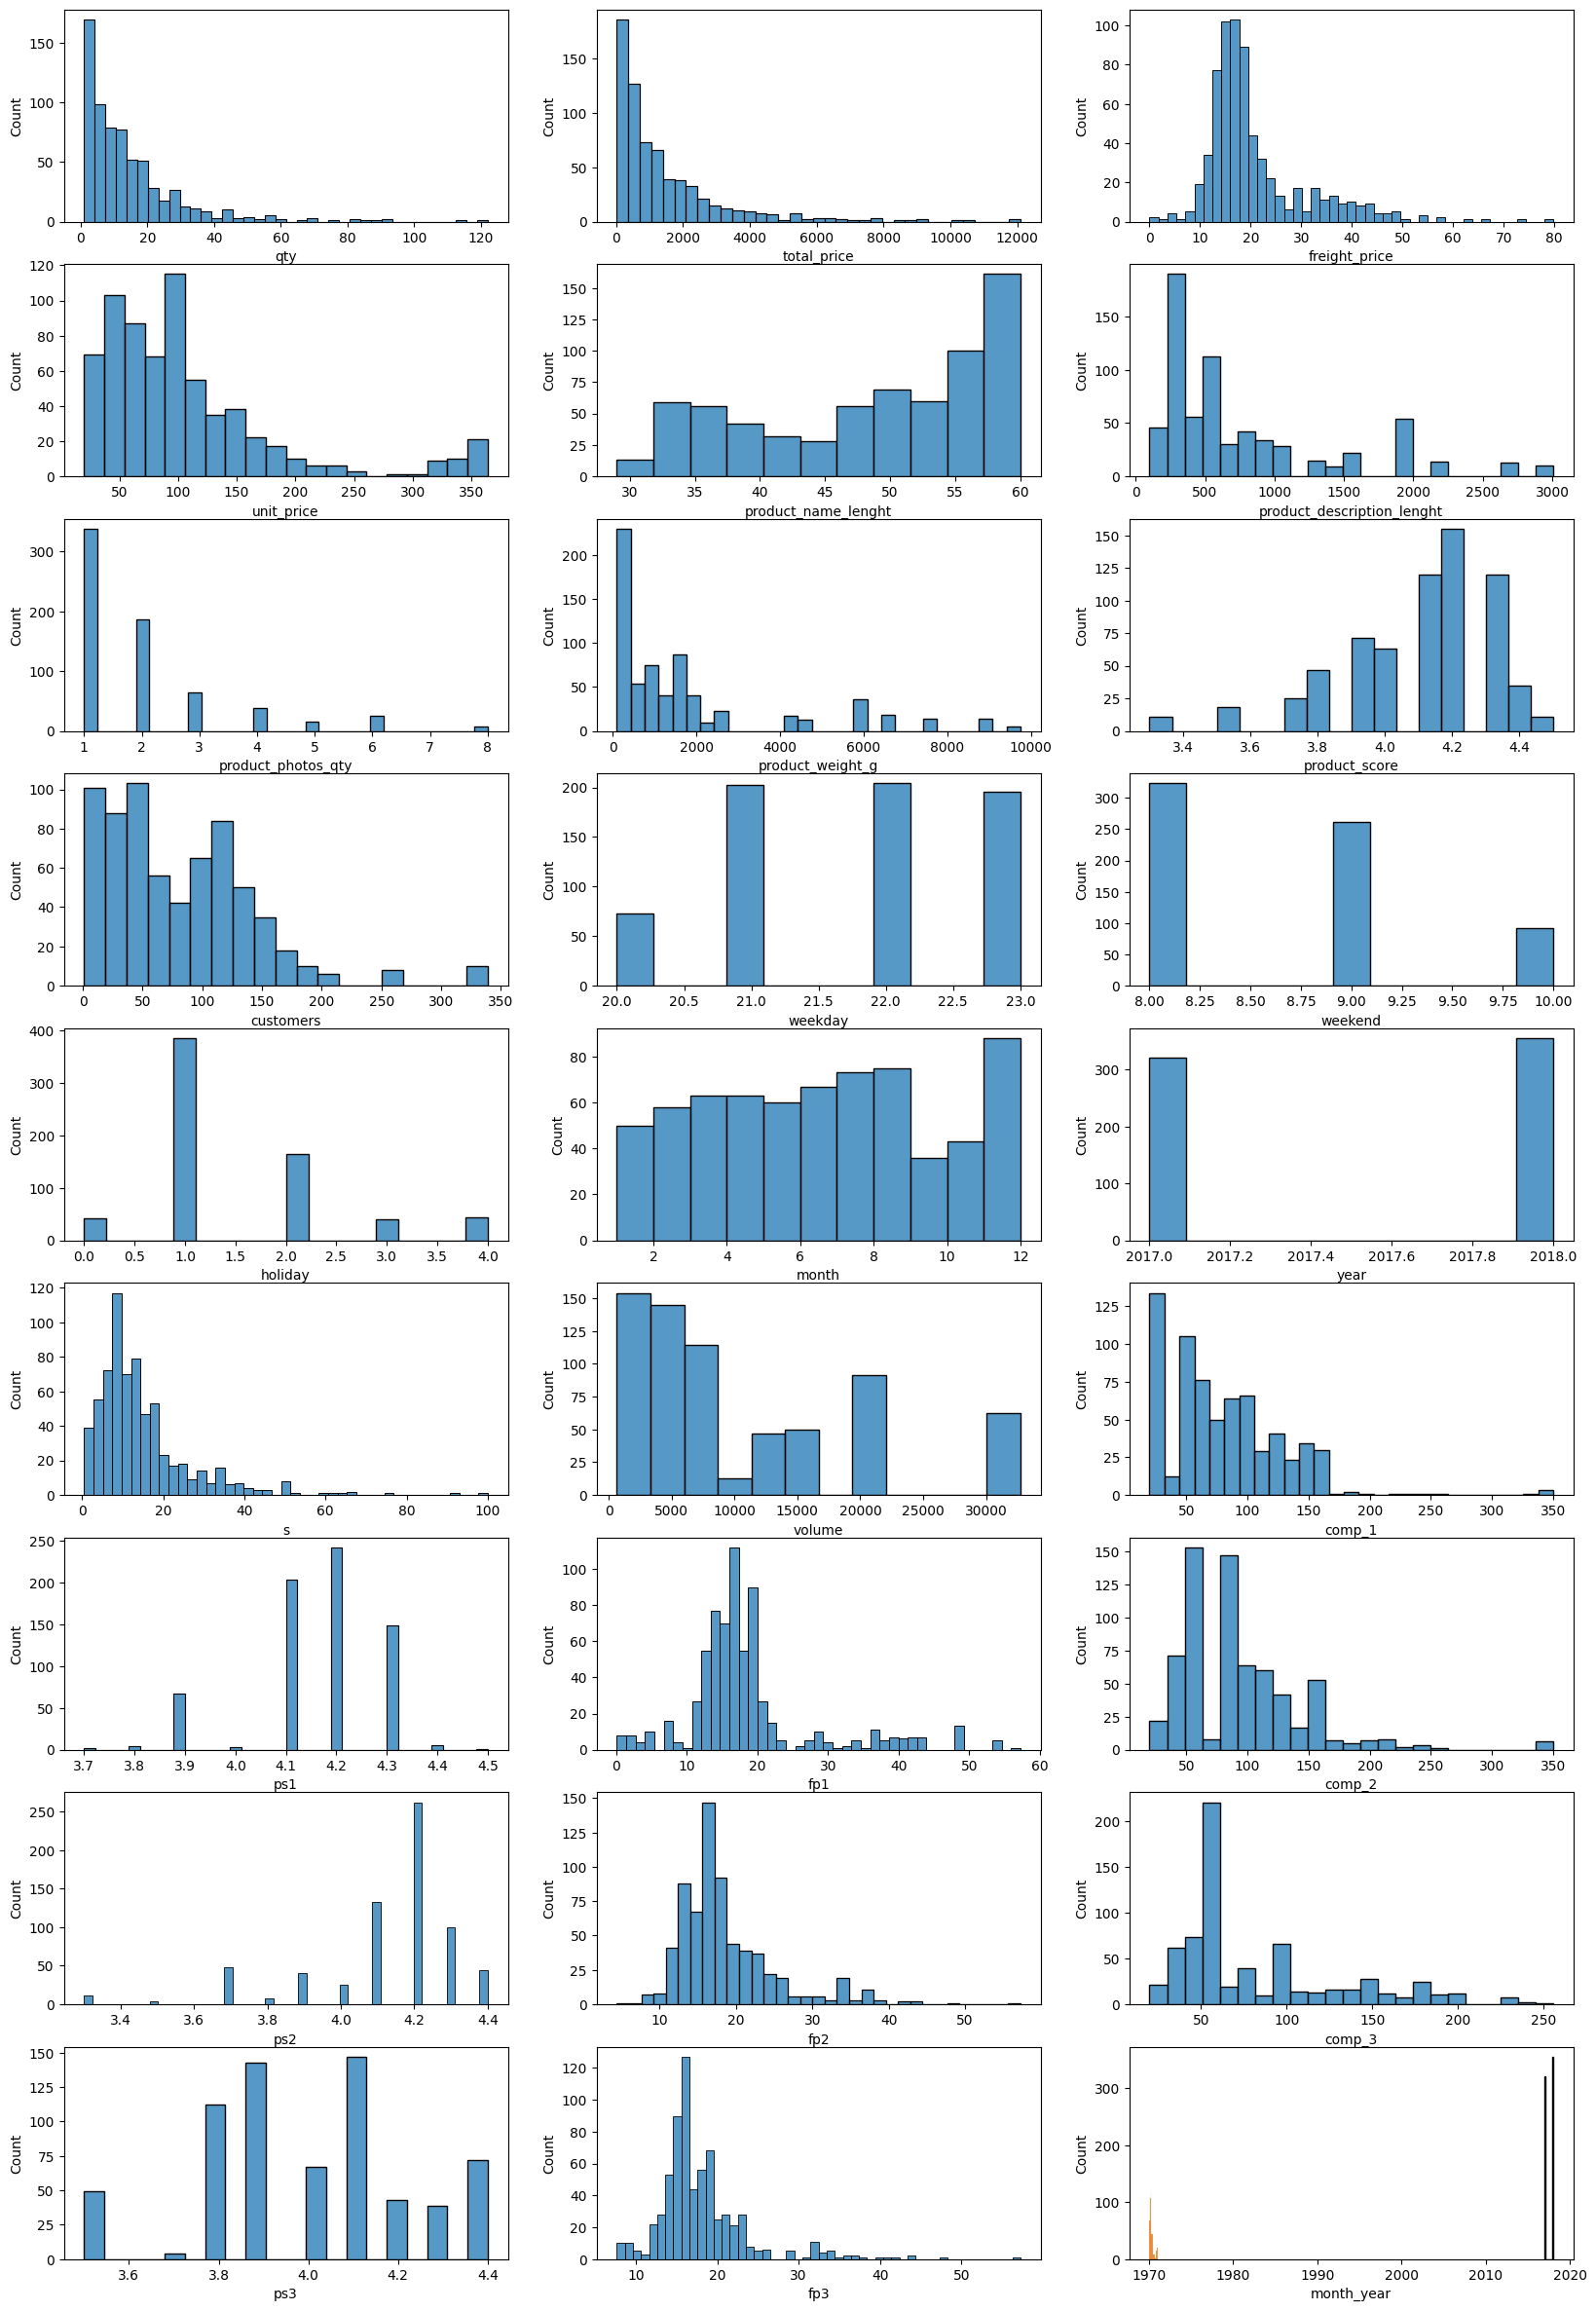

In [ ]:
fig, axes = plt.subplots(9, 3, figsize=(20, 30))
for i, col in enumerate(df.columns):
  ax = axes[i//3-1, i%3]
  if df[col].dtype == 'object':
    continue
  sns.histplot(df[col], ax=ax)

plt.show()
plt.close()


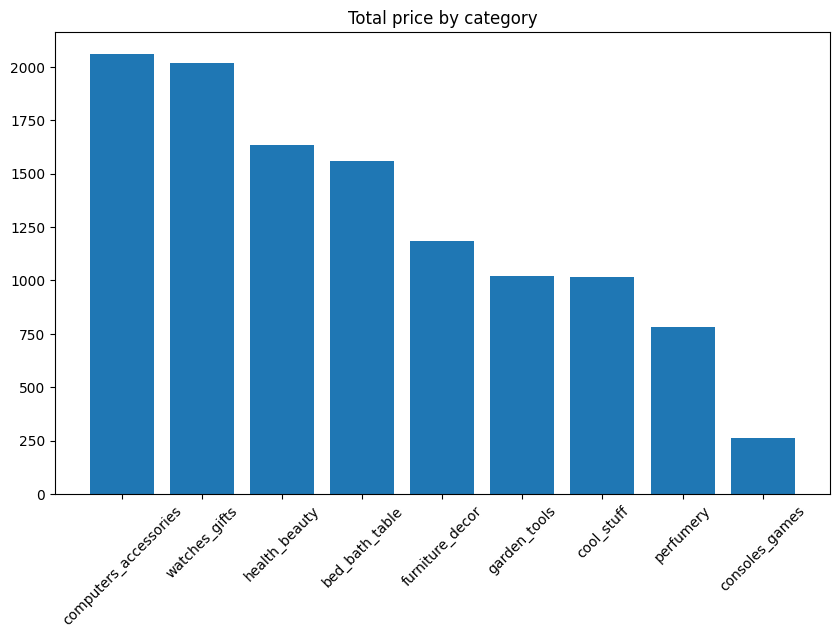

In [ ]:
prod_cat = df[["product_category_name", "total_price"]].groupby("product_category_name").mean().sort_values(by="total_price", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(prod_cat.index, prod_cat["total_price"])
plt.title("Total price by category")
plt.xticks(rotation=45)
plt.savefig("total_price_by_category.png")
plt.show()

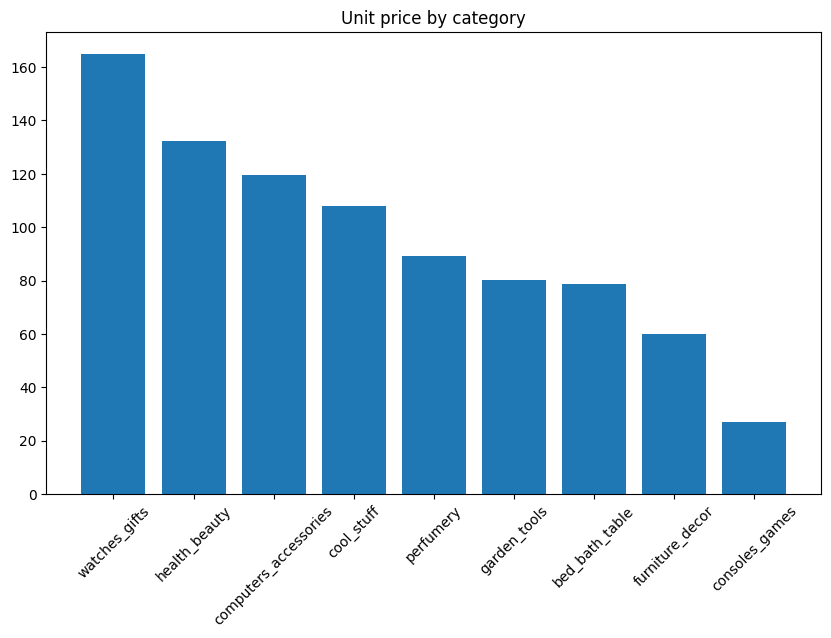

In [ ]:
prod_cat = df[["product_category_name", "unit_price"]].groupby("product_category_name").mean().sort_values(by="unit_price", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(prod_cat.index, prod_cat["unit_price"])
plt.title("Unit price by category")
plt.xticks(rotation=45)
plt.savefig("unit_price_by_category.png")
plt.show()

1. **Understanding the Price/Cost by comapring with the competitors**

  **Comparing the unit price**

In [ ]:
df['product_category_name'].unique()

array(['health_beauty', 'garden_tools', 'computers_accessories',
       'cool_stuff', 'bed_bath_table', 'watches_gifts', 'perfumery',
       'consoles_games', 'furniture_decor'], dtype=object)

In [ ]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
389,health7,health_beauty,2017-01-01,1,64.99,11.060000,64.990000,59,492,2,...,64.990000,3.9,11.060000,64.990000,3.9,11.060000,64.990000,3.9,11.060000,64.940000
339,health5,health_beauty,2017-01-01,8,2799.20,22.901250,349.900000,51,625,1,...,349.900000,4.3,22.901250,349.900000,4.3,22.901250,64.990000,3.9,11.060000,349.850000
420,garden3,garden_tools,2017-01-02,1,99.99,33.000000,99.990000,47,1893,1,...,99.990000,4.1,33.000000,99.990000,4.1,33.000000,99.990000,4.1,33.000000,99.940000
583,computers4,computers_accessories,2017-01-02,3,479.97,33.400000,159.990000,59,1893,1,...,159.990000,4.2,33.400000,159.990000,4.2,33.400000,159.990000,4.2,33.400000,159.940000
550,garden1,garden_tools,2017-01-02,1,99.99,28.890000,99.990000,58,1893,1,...,99.990000,4.3,28.890000,99.990000,4.3,28.890000,99.990000,4.3,28.890000,99.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,health2,health_beauty,2018-01-08,28,9240.00,20.505357,330.000000,60,2644,6,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
468,furniture3,furniture_decor,2018-01-08,1,35.00,19.440000,35.000000,41,789,1,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
368,watches8,watches_gifts,2018-01-08,11,1737.40,14.592727,157.945455,35,640,1,...,112.000000,4.2,13.440000,105.000000,4.2,23.385714,145.550909,3.8,21.897273,157.142857
280,watches6,watches_gifts,2018-01-08,1,112.00,13.440000,112.000000,33,523,3,...,112.000000,4.2,13.440000,105.000000,4.2,23.385714,145.550909,3.8,21.897273,118.363636


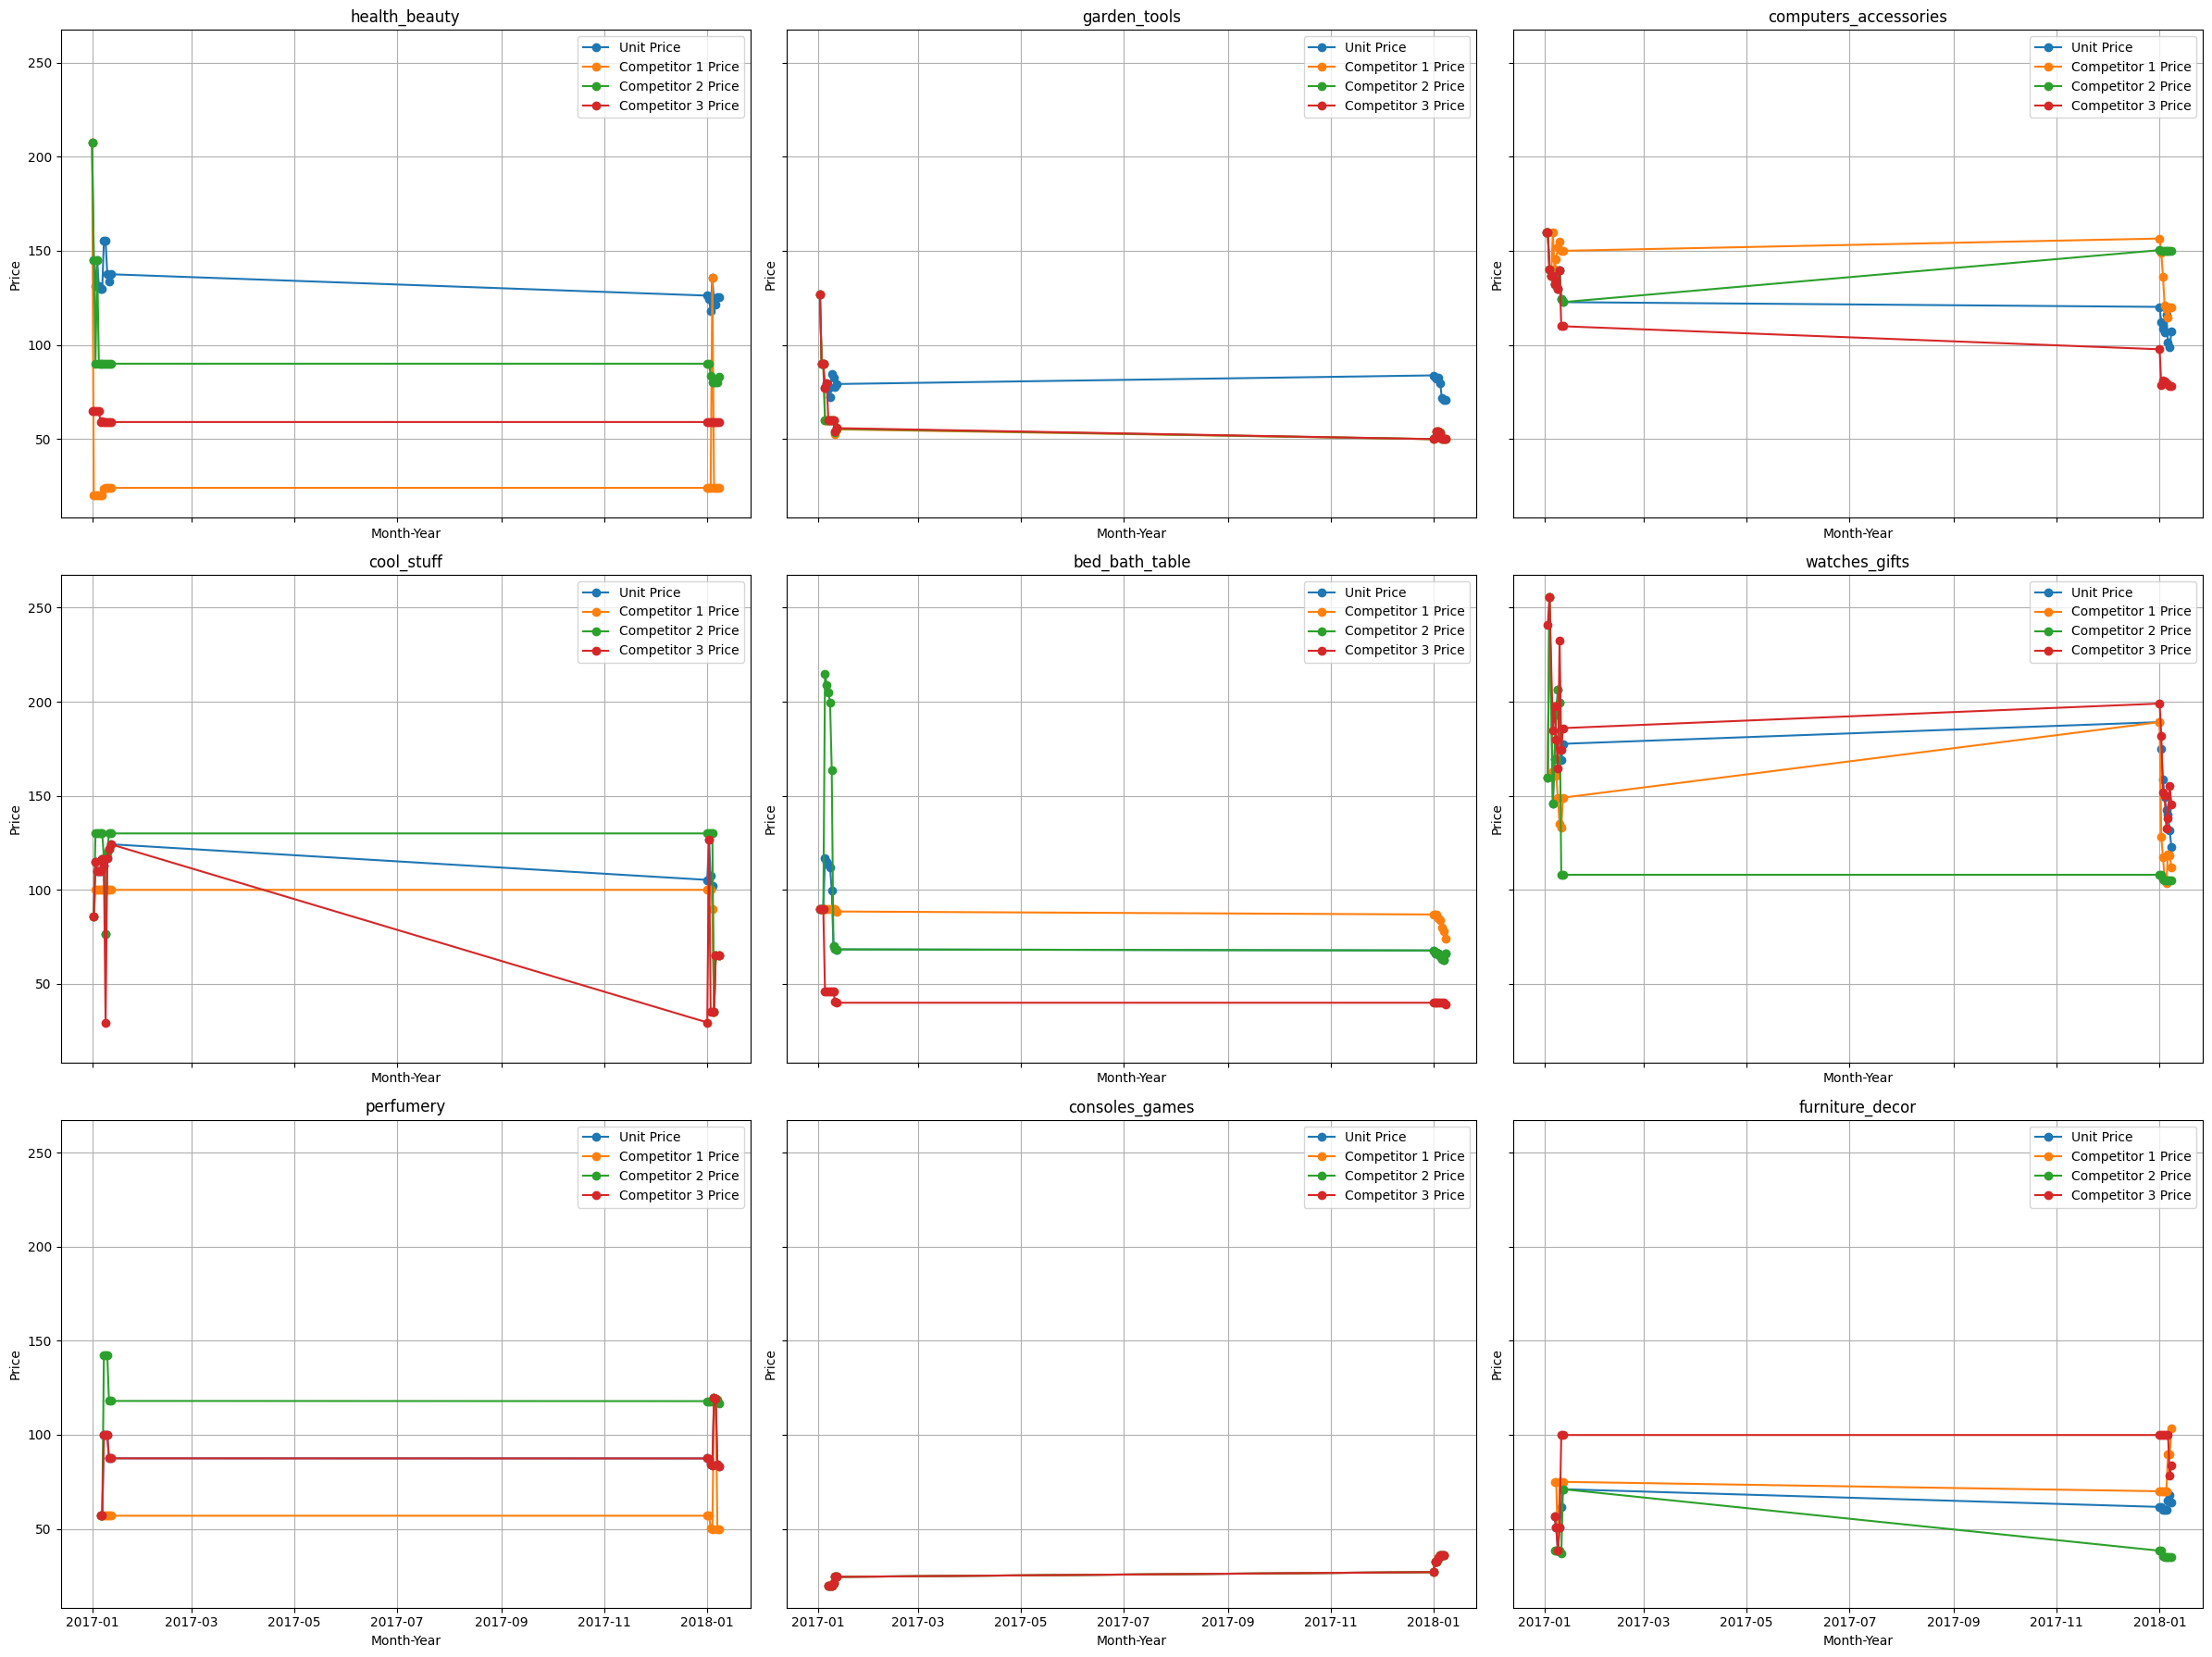

In [ ]:
product_category = df['product_category_name'].unique()
n_categories = len(product_category)
n_rows = (n_categories + 2) // 3  # Determine rows needed for 3 columns layout

# Create subplots with a larger figsize
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 6*n_rows), sharex=True, sharey=True)
# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each product category and plot the trends
for i, category in enumerate(product_category):
    # Filter for the specific product category
    filtered_data = df[df['product_category_name'] == category]

    # Aggregate the average prices by month_year
    agg_data = filtered_data.groupby('month_year').agg({
        'unit_price': 'mean',
        'comp_1': 'mean',
        'comp_2': 'mean',
        'comp_3': 'mean'
    }).reset_index()

    # Plot the trend lines
    ax = axes[i]
    ax.plot(agg_data['month_year'], agg_data['unit_price'], label='Unit Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['comp_1'], label='Competitor 1 Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['comp_2'], label='Competitor 2 Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['comp_3'], label='Competitor 3 Price', marker='o')

    # Set title and labels
    ax.set_title(f'{category}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Comparing the Frieight Price**

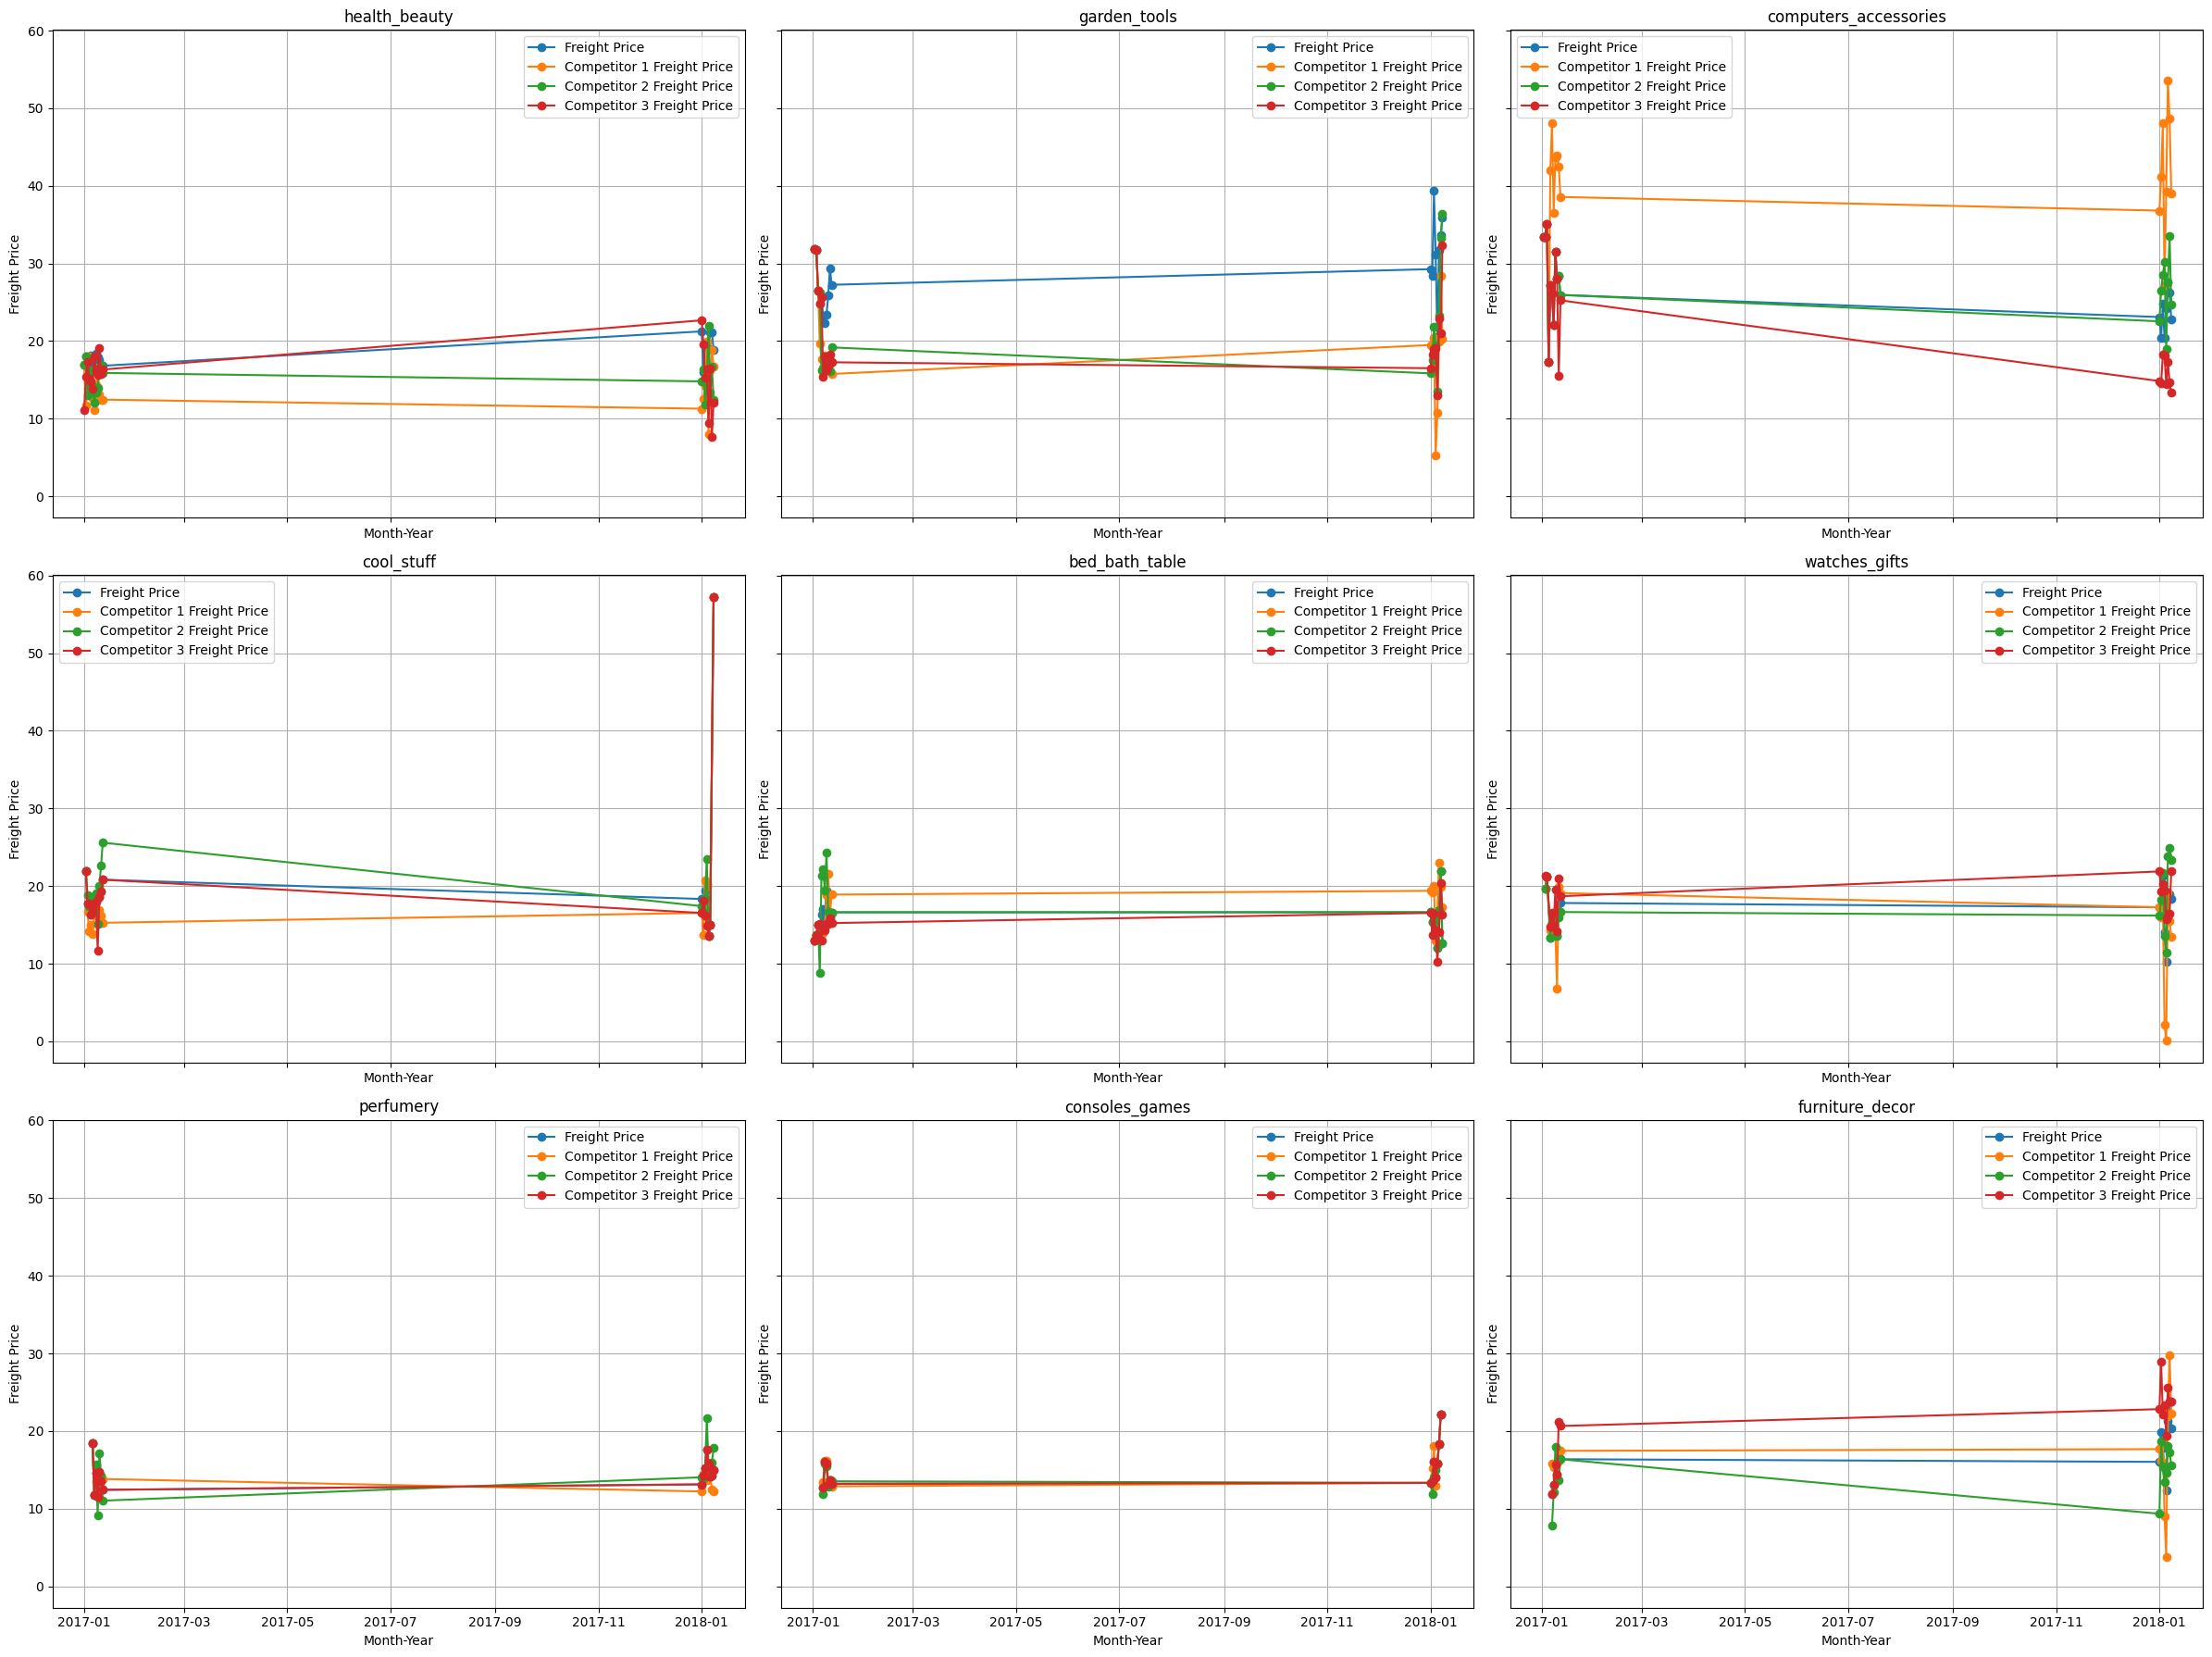

In [ ]:
# Define the number of subplots based on the number of categories
n_categories = len(product_category)
n_rows = (n_categories + 2) // 3  # Determine rows needed for 3 columns layout

# Create subplots with a larger figsize
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 6 * n_rows), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each product category and plot the trends
for i, category in enumerate(product_category):
    # Filter for the specific product category
    filtered_data = df[df['product_category_name'] == category]

    # Aggregate the average freight prices by month_year
    agg_data = filtered_data.groupby('month_year').agg({
        'freight_price': 'mean',
        'fp1': 'mean',
        'fp2': 'mean',
        'fp3': 'mean'
    }).reset_index()

    # Plot the trend lines
    ax = axes[i]
    ax.plot(agg_data['month_year'], agg_data['freight_price'], label='Freight Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['fp1'], label='Competitor 1 Freight Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['fp2'], label='Competitor 2 Freight Price', marker='o')
    ax.plot(agg_data['month_year'], agg_data['fp3'], label='Competitor 3 Freight Price', marker='o')

    # Set title and labels
    ax.set_title(f'{category}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Freight Price')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Comparing the product rating for the products by company**

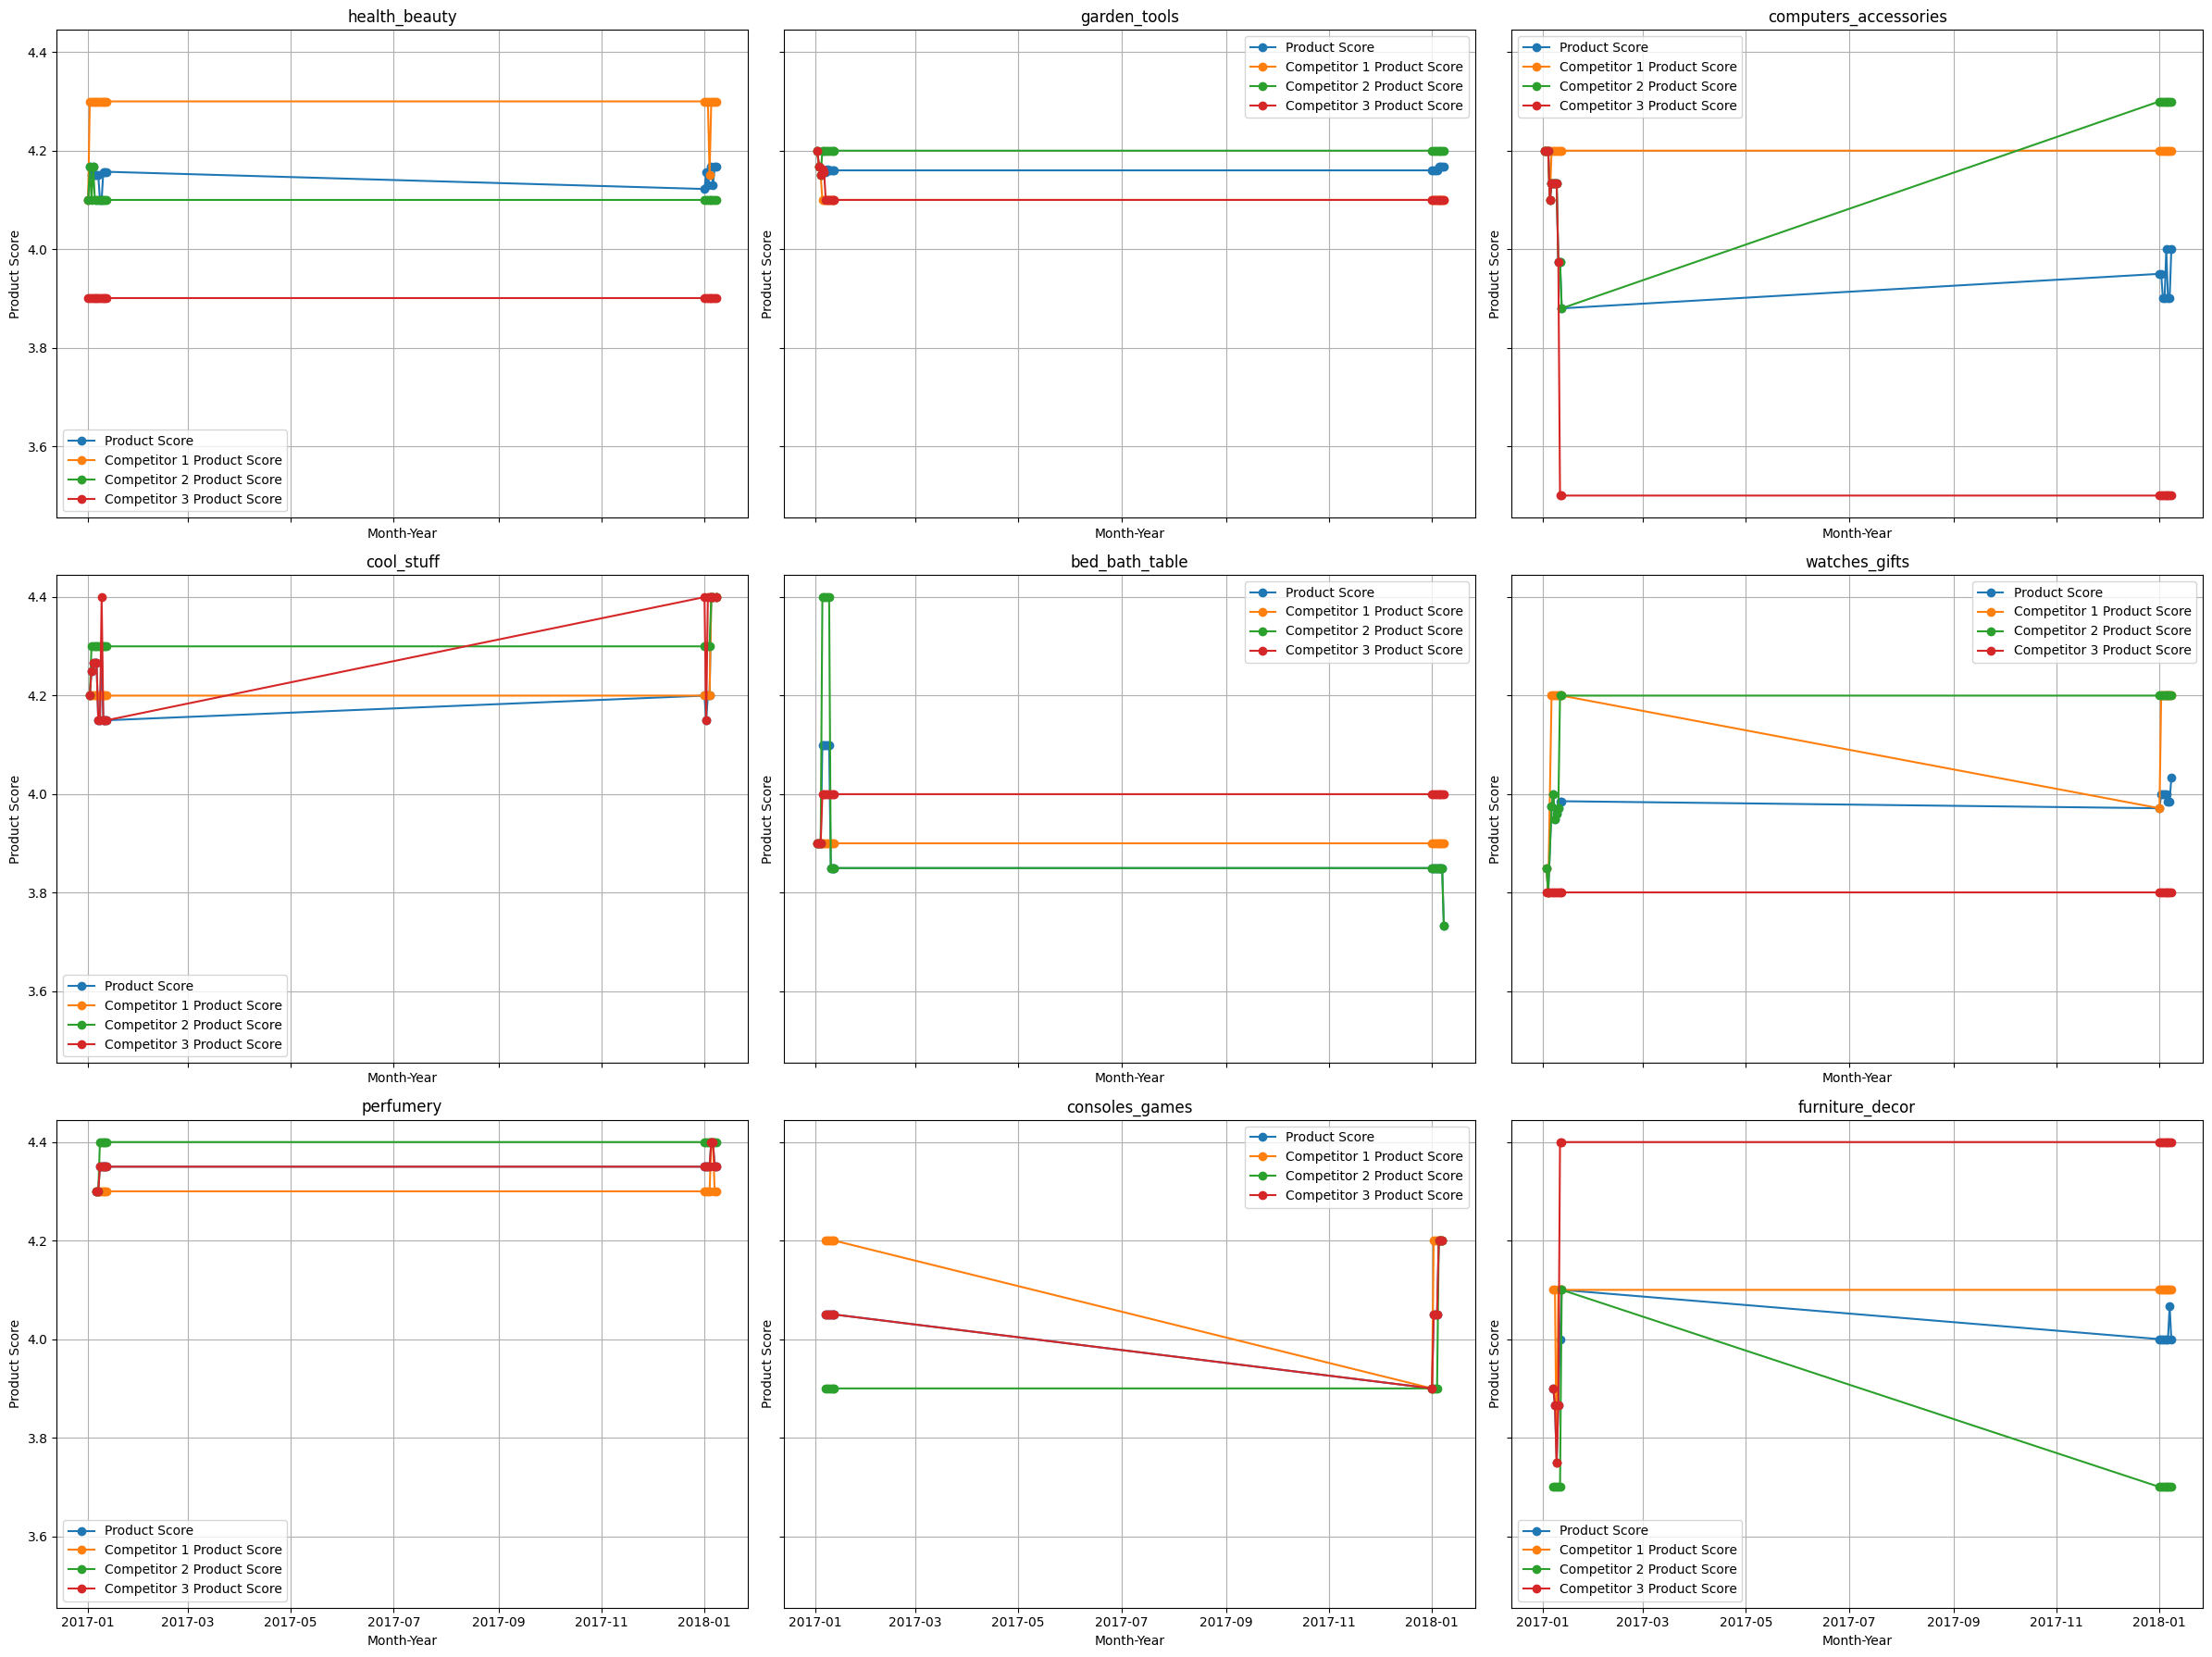

In [ ]:
# Define the number of subplots based on the number of categories
n_categories = len(product_category)
n_rows = (n_categories + 2) // 3  # Determine rows needed for 3 columns layout

# Create subplots with a larger figsize
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 6 * n_rows), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each product category and plot the trends
for i, category in enumerate(product_category):
    # Filter for the specific product category
    filtered_data = df[df['product_category_name'] == category]

    # Aggregate the average product scores by month_year
    agg_data = filtered_data.groupby('month_year').agg({
        'product_score': 'mean',
        'ps1': 'mean',
        'ps2': 'mean',
        'ps3': 'mean'
    }).reset_index()

    # Plot the trend lines
    ax = axes[i]
    ax.plot(agg_data['month_year'], agg_data['product_score'], label='Product Score', marker='o')
    ax.plot(agg_data['month_year'], agg_data['ps1'], label='Competitor 1 Product Score', marker='o')
    ax.plot(agg_data['month_year'], agg_data['ps2'], label='Competitor 2 Product Score', marker='o')
    ax.plot(agg_data['month_year'], agg_data['ps3'], label='Competitor 3 Product Score', marker='o')

    # Set title and labels
    ax.set_title(f'{category}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Product Score')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

2. 1 **No. of Customers in each category**

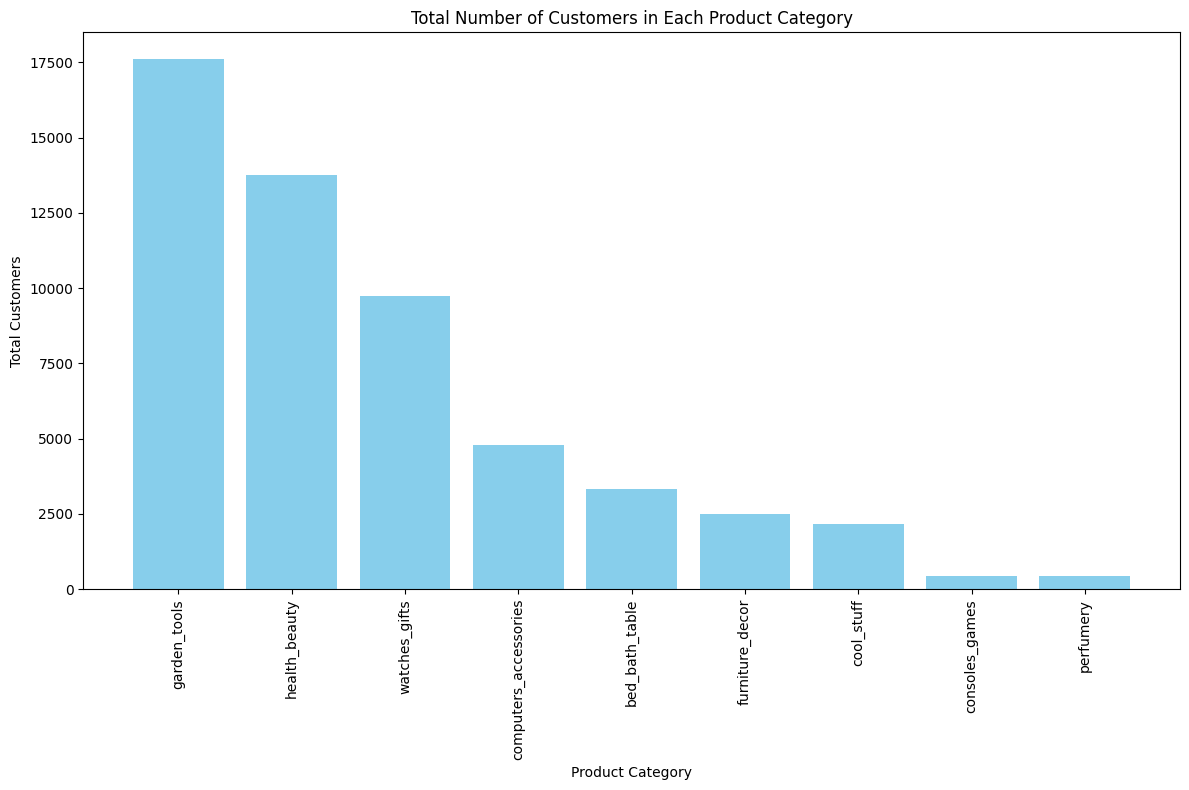

In [ ]:
# Aggregate the total number of customers for each product category
category_customers = df.groupby('product_category_name')['customers'].sum().reset_index()

# Sort categories by total customers
category_customers = category_customers.sort_values(by='customers', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(category_customers['product_category_name'], category_customers['customers'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Customers')
plt.title('Total Number of Customers in Each Product Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

2 Purchase across the time series

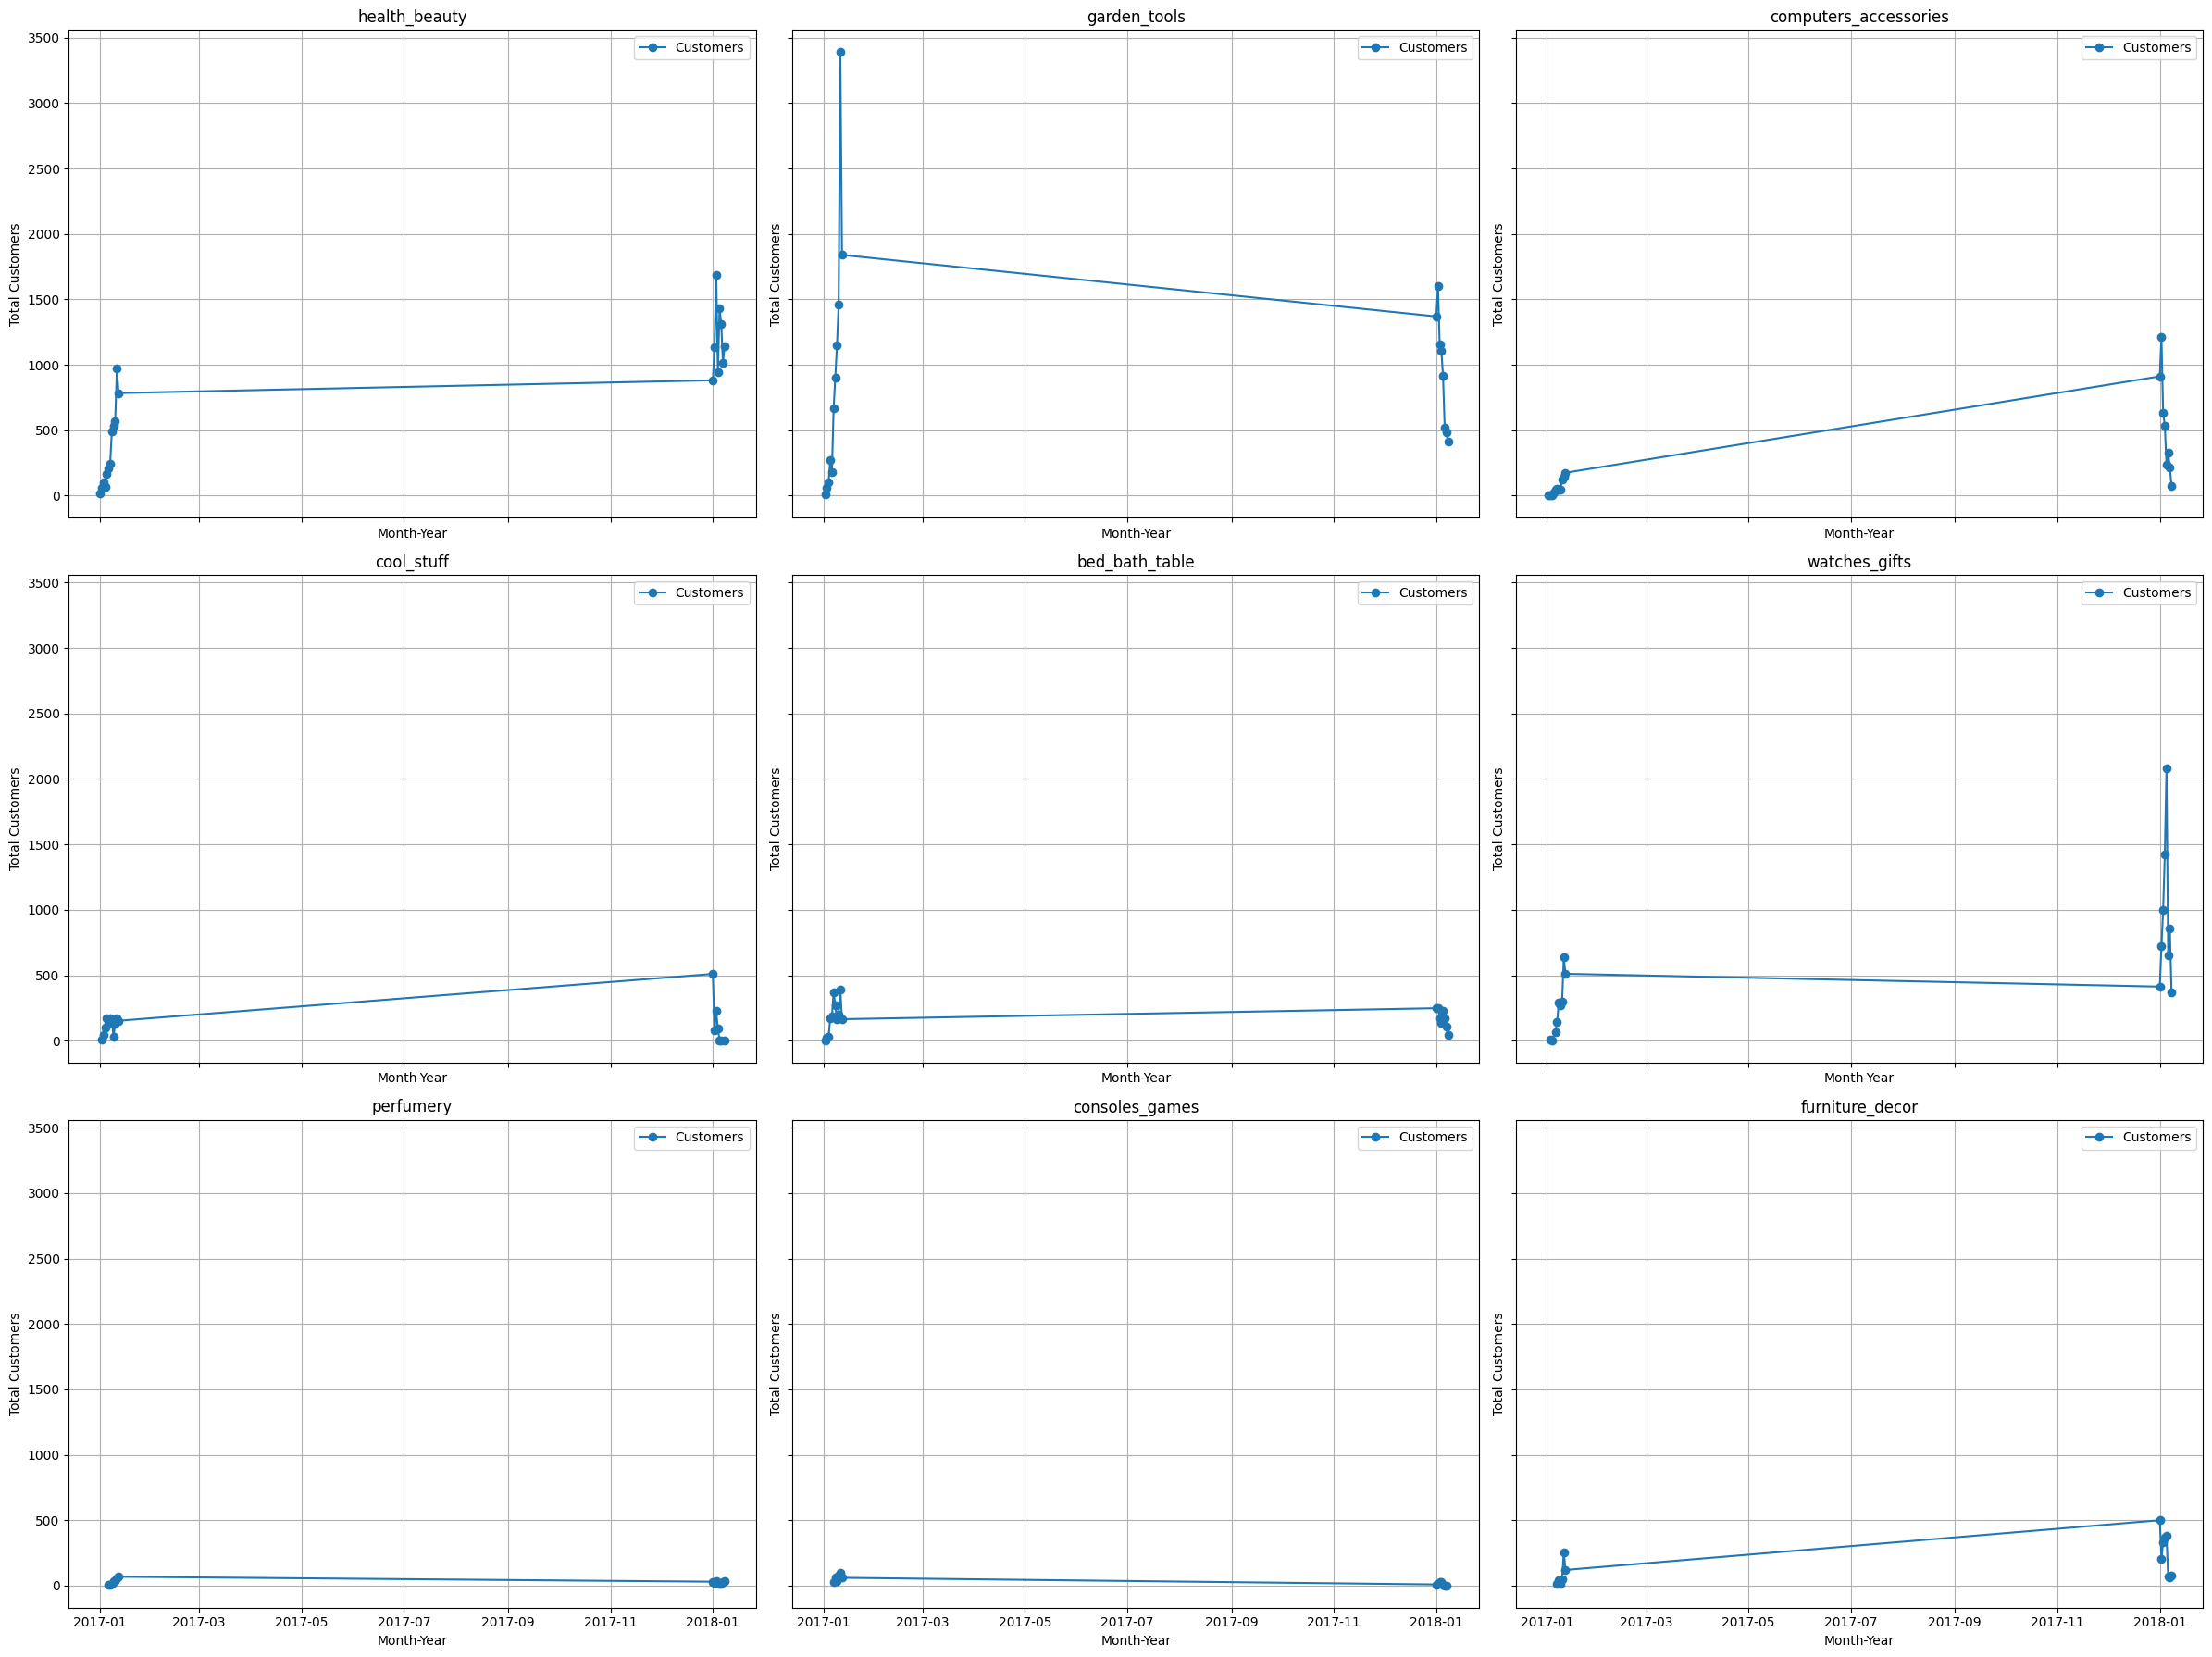

In [ ]:
# Define the number of subplots based on the number of categories
n_categories = len(product_category)
n_rows = (n_categories + 2) // 3  # Determine rows needed for 3 columns layout

# Create subplots with a larger figsize
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 6 * n_rows), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each product category and plot the trends
for i, category in enumerate(product_category):
    # Filter for the specific product category
    filtered_data = df[df['product_category_name'] == category]

    # Aggregate the total number of customers by month_year
    agg_data = filtered_data.groupby('month_year')['customers'].sum().reset_index()

    # Plot the trend lines
    ax = axes[i]
    ax.plot(agg_data['month_year'], agg_data['customers'], label='Customers', marker='o')

    # Set title and labels
    ax.set_title(f'{category}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Total Customers')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df[df['product_category_name']=='health_beauty']

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
389,health7,health_beauty,2017-01-01,1,64.99,11.060000,64.990000,59,492,2,...,64.99,3.9,11.060000,64.990000,3.9,11.060000,64.99,3.9,11.060000,64.94
339,health5,health_beauty,2017-01-01,8,2799.20,22.901250,349.900000,51,625,1,...,349.90,4.3,22.901250,349.900000,4.3,22.901250,64.99,3.9,11.060000,349.85
340,health5,health_beauty,2017-01-02,4,1399.60,26.927500,349.900000,51,625,1,...,19.99,4.3,11.750909,349.900000,4.3,26.927500,64.99,3.9,15.348000,349.90
58,health9,health_beauty,2017-01-02,11,219.89,11.750909,19.990000,48,575,1,...,19.99,4.3,11.750909,19.990000,4.3,11.750909,64.99,3.9,15.348000,19.94
390,health7,health_beauty,2017-01-02,5,324.95,15.348000,64.990000,59,492,2,...,19.99,4.3,11.750909,64.990000,3.9,15.348000,64.99,3.9,15.348000,64.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,health8,health_beauty,2018-01-08,7,579.75,12.418571,82.821429,59,492,3,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,79.99
408,health7,health_beauty,2018-01-08,3,176.97,12.083333,58.990000,59,492,2,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,58.99
92,health3,health_beauty,2018-01-08,32,3935.68,36.941875,122.990000,50,1257,1,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,122.99
188,health6,health_beauty,2018-01-08,28,1875.72,23.528214,66.990000,50,1257,1,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,66.99


**General Insights:**

1. *Pricing:*
Most categories have unit prices higher than competitor prices, indicating a potential premium positioning in the market. Significant price adjustments in some categories (e.g., Bed Bath Table, Cool Stuff) suggest strategic changes in pricing to align with competition.

2. *Customer Trends:*
Categories like Health Beauty, Computers Accessories, and Watches Gifts show significant growth in customer counts, indicating increasing demand. Stable or declining trends in categories like Bed Bath Table and Garden Tools may require investigation into market conditions or competitive actions.


In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

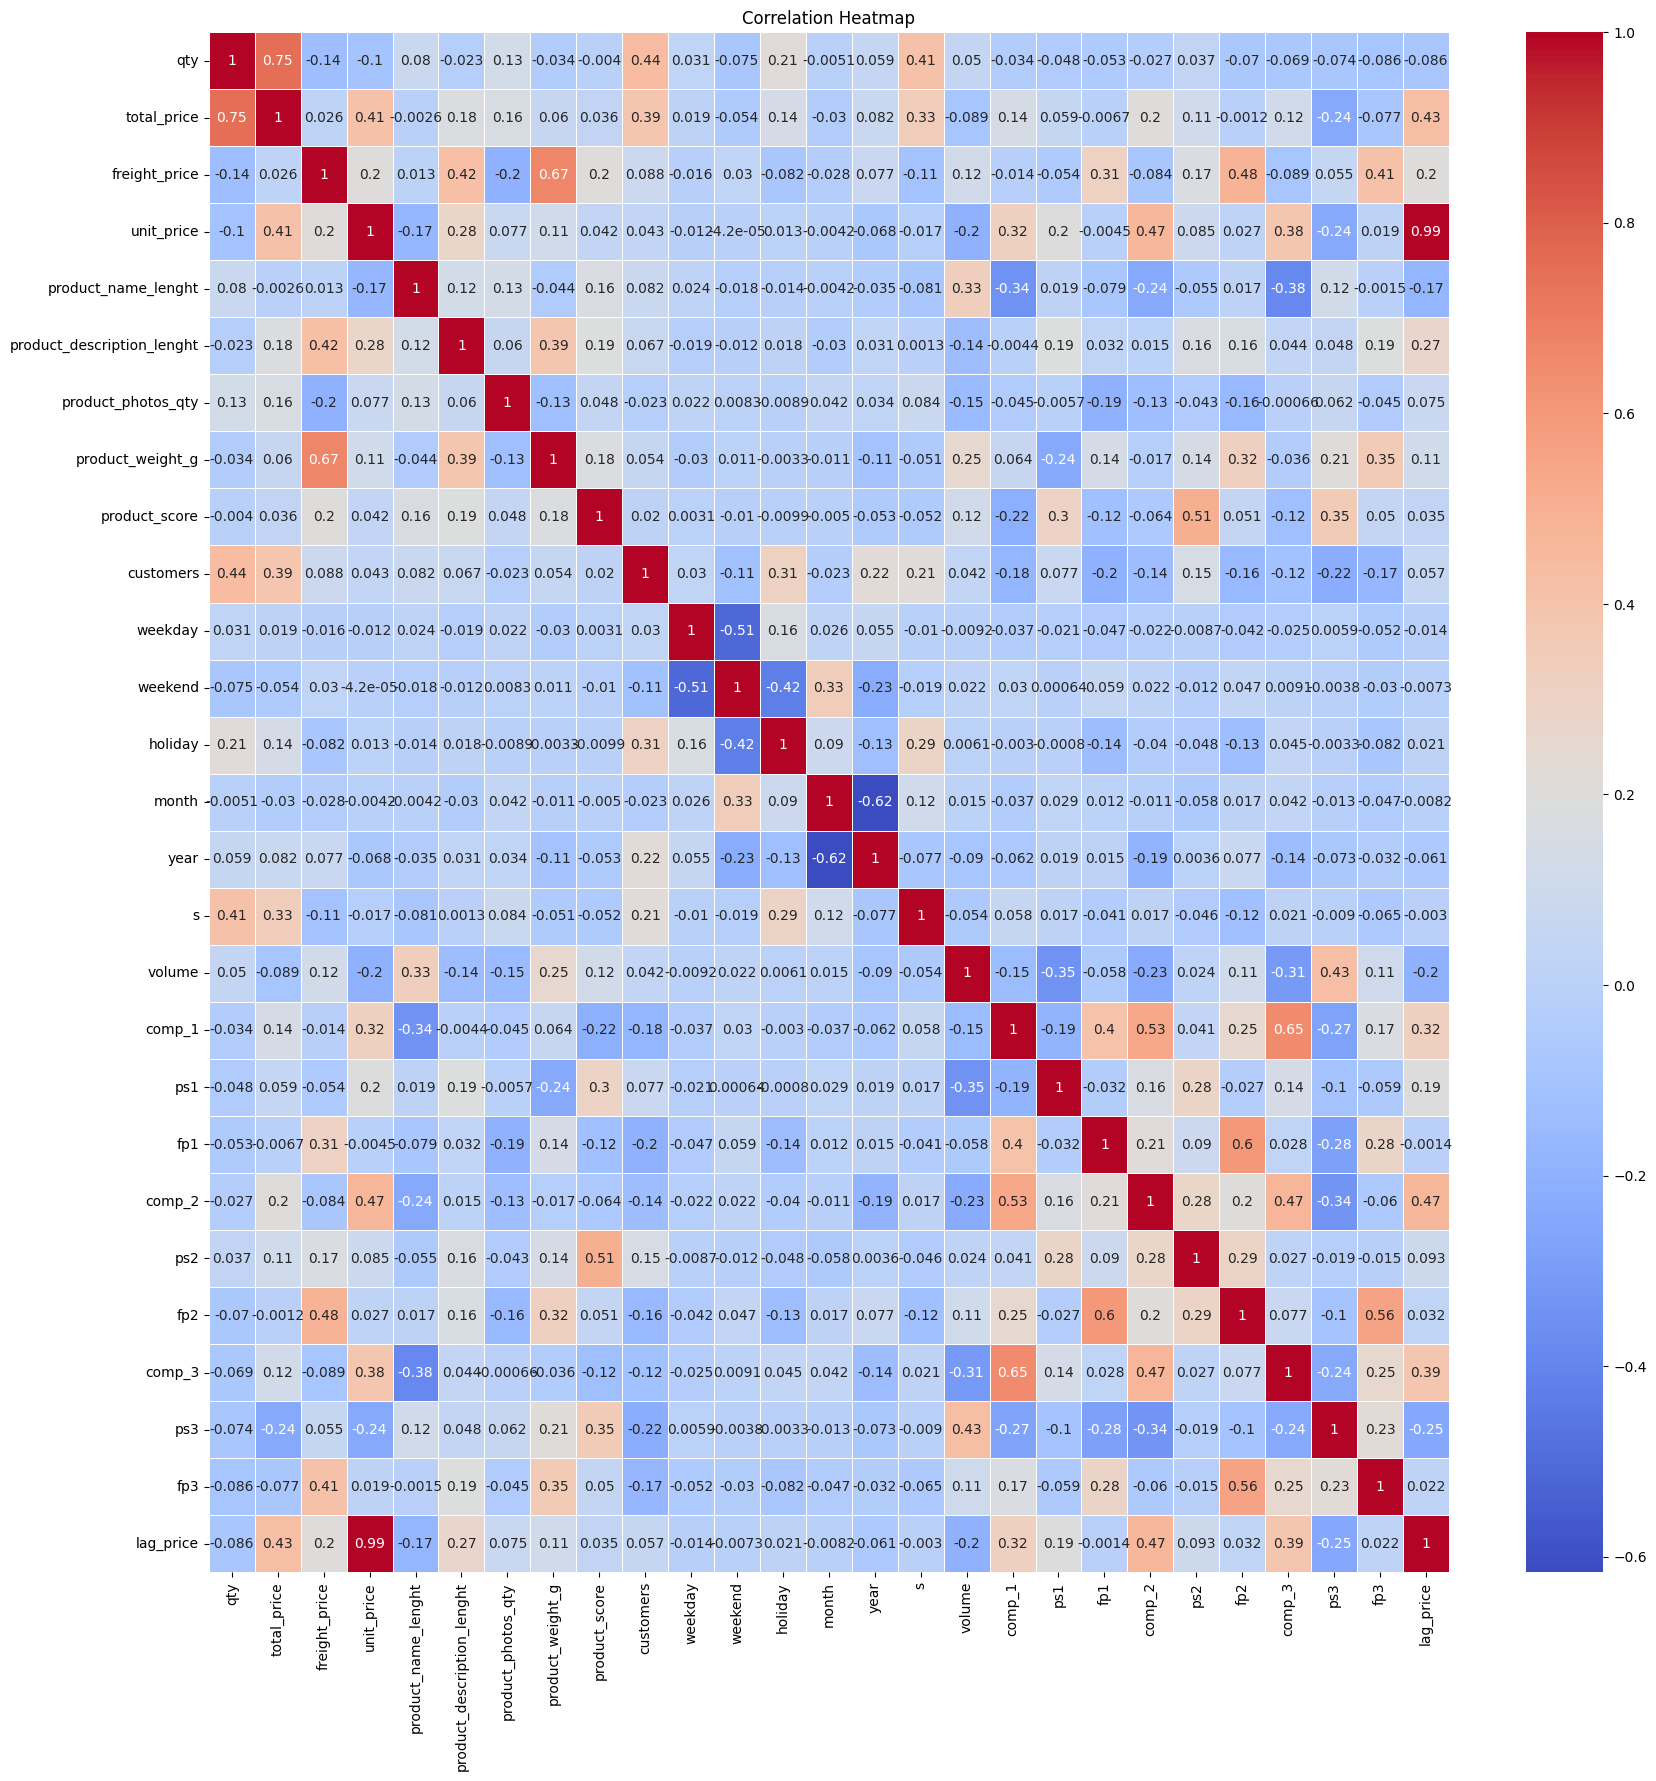

In [ ]:
numeric_only = df[['qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price']]

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_only.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Interpreting the Heatmap:
Understanding Correlation Values

1. *Positive Correlation (0 to +1)*: Indicates that as one variable increases, the other variable also tends to increase. Values closer to +1 imply a strong positive relationship.

2. *Negative Correlation (0 to -1)*: Indicates that as one variable increases, the other variable tends to decrease. Values closer to -1 imply a strong negative relationship.

3. *Zero Correlation (0)*: Indicates no linear relationship between the variables.

Here's a detailed interpretation of each significant correlation:

1. **Total Price and Quantity:** There is a strong positive correlation between the total price and the quantity of items sold. This suggests that as the quantity of products sold increases, the total revenue generated also increases significantly.

*Implication*: This is expected in retail, as selling more units typically results in higher total sales revenue.

2. **Lag Price and Unit Price:** The lag price (previous price) is almost identical to the current unit price. This indicates very little change in the unit price over time.

*Implication*: Price stability is observed, suggesting a strategy of maintaining consistent pricing or very gradual changes in pricing.

3. **Freight Price of Competitor 2 (fp2) and Competitor 3 (fp3)** There is a moderate positive correlation between the freight prices of competitor 2 and competitor 3. This indicates that the freight prices for these competitors tend to move in the same direction.

*Implication*: Competitors might be reacting similarly to market conditions or have similar cost structures affecting their freight pricing.

4. **Competitor 1 (comp_1) and Competitor 3 (comp_3):** A strong positive correlation between the prices of competitor 1 and competitor 3 suggests that their pricing strategies are closely aligned.

*Implication*: These competitors might be in direct competition with each other, influencing each other's pricing decisions.

5. **Freight Price of Competitor 2 (fp2) and Product Score:** A moderate positive correlation between the freight price of competitor 2 and the product score indicates that higher freight prices from this competitor are associated with higher product scores.

*Implication*: Competitor 2 might charge higher freight for higher quality or higher-rated products.

6. **Product Weight (product_weight_g) and Freight Price:** A strong positive correlation between product weight and freight price suggests that heavier products have higher shipping costs.

*Implication*: This is intuitive and expected as shipping costs generally increase with the weight of the product

7. **Weekend and Weekday:** There is a moderate negative correlation between weekend and weekday sales/activities. This indicates that what happens during weekdays is inversely related to what happens during weekends.

*Implication*: This might reflect typical consumer behavior, where purchasing patterns differ significantly between weekdays and weekends.

8. **Year and Month:** A strong negative correlation between the year and the month variable likely reflects a coding scheme where as the year progresses, month values decrease or are coded in a manner leading to this correlation.

*Implication*: This could be a data coding artifact rather than a meaningful relationship. However, if it reflects a decreasing trend in some aspect of the business (e.g., sales), it warrants further investigation. Overall Insights and Actions

In [ ]:
# one-hot encoding
onehot_category = pd.get_dummies(df["product_category_name"], dtype=np.int8)

onehot_id = pd.get_dummies(df["product_id"], dtype=np.int8)
df = pd.concat([df, onehot_category, onehot_id], axis=1)
df.columns = df.columns.astype(str)

In [ ]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,perfumery1,perfumery2,watches1,watches2,watches3,watches4,watches5,watches6,watches7,watches8
389,health7,health_beauty,2017-01-01,1,64.99,11.06000,64.99,59,492,2,...,0,0,0,0,0,0,0,0,0,0
339,health5,health_beauty,2017-01-01,8,2799.20,22.90125,349.90,51,625,1,...,0,0,0,0,0,0,0,0,0,0
420,garden3,garden_tools,2017-01-02,1,99.99,33.00000,99.99,47,1893,1,...,0,0,0,0,0,0,0,0,0,0
583,computers4,computers_accessories,2017-01-02,3,479.97,33.40000,159.99,59,1893,1,...,0,0,0,0,0,0,0,0,0,0
550,garden1,garden_tools,2017-01-02,1,99.99,28.89000,99.99,58,1893,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
numeric_features = ['unit_price', 'freight_price', 'product_score', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Create lagged features
for lag in range(1, 8):  # For the past week
    df[f'unit_price_lag_{lag}'] = df['unit_price'].shift(lag)
    df[f'comp_1_lag_{lag}'] = df['comp_1'].shift(lag)
    df[f'fp1_lag_{lag}'] = df['fp1'].shift(lag)
    df[f'ps1_lag_{lag}'] = df['ps1'].shift(lag)

df.dropna(inplace=True)  # Drop rows with NaN values created by lagging


In [ ]:
X = df.drop(columns=['product_id','product_category_name','unit_price'])
y = df['unit_price']

# Assuming you want to forecast for the next week
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

When selecting models for a forecasting problem, it is important to justify your choices based on several factors including the nature of the data, the problem requirements, and the strengths of each model.

1. Linear Regression
* Reason for Selection: Linear Regression is a simple and interpretable model. It works well when there is a linear relationship between the dependent and independent variables.

* Support: Given that our correlation analysis showed strong relationships between certain variables, Linear Regression can effectively capture these relationships and provide a baseline for comparison with more complex models.
2. Decision Tree Regressor
* Reason for Selection: Decision Trees can model non-linear relationships and interactions between variables. They are also easy to interpret.

* Support: Decision Trees are chosen because they can capture complex patterns and interactions in the data that linear models might miss, providing a more flexible approach to forecasting.
3. Random Forest Regressor
* Reason for Selection: Random Forests are an ensemble of Decision Trees, which helps in reducing overfitting and improving generalization. They are robust and can handle a large number of features.
* Support: Given the multiple features involved (competitor prices, freight prices, product scores, etc.), Random Forest can aggregate multiple decision trees to provide a robust prediction, improving performance over a single Decision Tree.
4. Gradient Boosting Regressor¶
* Reason for Selection: Gradient Boosting builds models sequentially, where each model tries to correct the errors of the previous ones. It is powerful for capturing complex patterns in the data.
* Support: Gradient Boosting is known for its high predictive accuracy and ability to handle a mixture of continuous and categorical features. This makes it suitable for our dataset which has a mix of encoded categorical variables and numerical features.
5. Support Vector Regressor (SVR)
* Reason for Selection: SVR is effective for high-dimensional spaces and is robust to overfitting, especially in cases where the number of dimensions exceeds the number of samples.
* Support: SVR can capture complex relationships in the data by transforming it into higher dimensions, making it a good candidate for forecasting tasks with non-linear patterns.

product_id                       object
product_category_name            object
month_year               datetime64[ns]
qty                               int64
total_price                     float64
                              ...      
ps1_lag_6                       float64
unit_price_lag_7                float64
comp_1_lag_7                    float64
fp1_lag_7                       float64
ps1_lag_7                       float64
Length: 119, dtype: object
['health_beauty' 'garden_tools' 'bed_bath_table' 'watches_gifts'
 'cool_stuff' 'computers_accessories' 'perfumery' 'consoles_games'
 'furniture_decor']


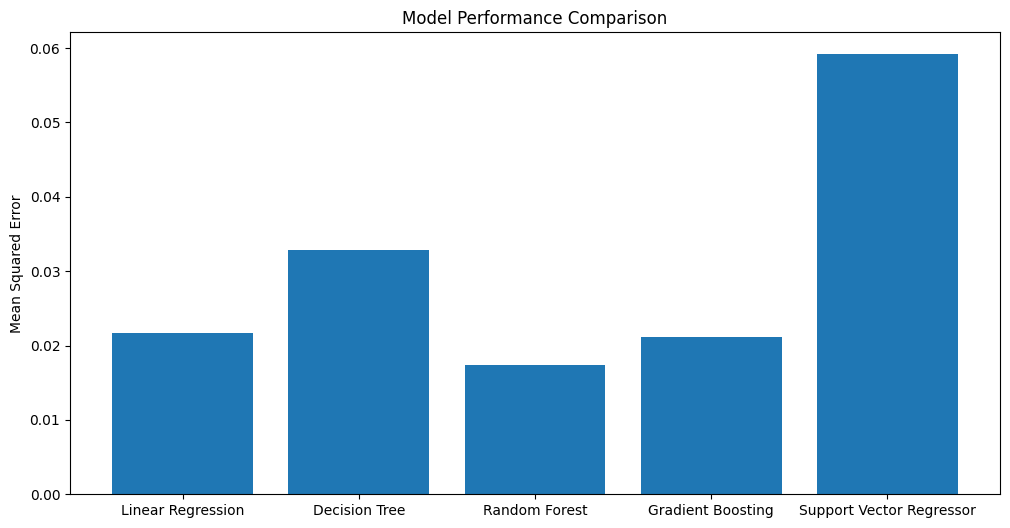

In [ ]:
# Ensure 'product_id' is a string
df['product_id'] = df['product_id'].astype(str)

# Display data types and handle mixed types
print(df.dtypes)

# Inspect unique values in 'product_category_name' to check for inconsistencies
print(df['product_category_name'].unique())

# # Clean data if necessary (example replacing an unexpected value)
# df['product_category_name'] = df['product_category_name'].replace('garden1', 'garden_tools')

# Check for columns with mixed data types and convert them properly
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass

# Perform one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=['product_category_name'], drop_first=True)

# Ensure all features (except 'product_id') are numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Drop 'product_id' from the features as it is not relevant for model training
X = df.drop(columns=['product_id', 'unit_price'])
y = df['unit_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

1. Random Forest:

Performance: This model has one of the lowest MSEs, indicating strong predictive performance.

Reason for Selection: Random Forest is powerful for capturing complex patterns and interactions by sequentially correcting errors made by previous models. It's often one of the best-performing models in structured data tasks.

2. Support Vector Regressor (SVR):
Performance: This model has the highest MSE among the models compared, indicating it did not perform well for this task.

In [ ]:
"""To forecast prices effectively, we should use features that have predictive power and relevance to the price behavior. Based on your description and the provided context, the following features are crucial for forecasting prices:

Competitor Prices:

1. Competitor 1 Unit Price
2. Competitor 2 Unit Price
3. Competitor 3 Unit Price

Freight Prices:

1. Competitor 1 Freight Price
2. Competitor 2 Freight Price
3. Competitor 3 Freight Price

Product Characteristics:

1. Product Score
2. Product Weight

Time-related Features:

1.Year
2. Month
3. Day of the Week (to capture seasonality and weekly trends)

Lagged Prices: Prices from previous periods (e.g., previous week, previous month) which can capture the trend and momentum.

Other Potential Features:

1. Quantity Sold
2. Promotions or Discounts
3. External factors such as economic indicators (if available)"""

'To forecast prices effectively, we should use features that have predictive power and relevance to the price behavior. Based on your description and the provided context, the following features are crucial for forecasting prices:\n\nCompetitor Prices:\n\n1. Competitor 1 Unit Price\n2. Competitor 2 Unit Price\n3. Competitor 3 Unit Price\n\nFreight Prices:\n\n1. Competitor 1 Freight Price\n2. Competitor 2 Freight Price\n3. Competitor 3 Freight Price\n\nProduct Characteristics:\n\n1. Product Score\n2. Product Weight\n\nTime-related Features:\n\n1.Year\n2. Month\n3. Day of the Week (to capture seasonality and weekly trends)\n\nLagged Prices: Prices from previous periods (e.g., previous week, previous month) which can capture the trend and momentum.\n\nOther Potential Features:\n\n1. Quantity Sold\n2. Promotions or Discounts\n3. External factors such as economic indicators (if available)'